In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

In [2]:
df=pd.read_csv('Diabetes_cleaned.csv')
df.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,diabetesMed,readmitted,preceding_year_visits,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Referral,1,41,0,1,Diabetes,...,-2,-2,-2,-2,-2,0,0,0,0.0,no_med
1,Caucasian,0,15,Discharged to home,Emergency,3,59,0,18,"Endocrine, Nutritional, Metabolic, Immunity",...,-2,-2,-2,-2,1,1,0,0,1.0,insulin_only
2,AfricanAmerican,0,25,Discharged to home,Emergency,2,11,5,13,"Pregnancy, Childbirth",...,0,-2,-2,-2,-2,1,0,3,0.0,other_meds
3,Caucasian,1,35,Discharged to home,Emergency,2,44,1,16,Infectious and Parasitic,...,-2,-2,-2,-2,1,1,0,0,1.0,insulin_only
4,Caucasian,1,45,Discharged to home,Emergency,1,51,0,8,Neoplasms,...,0,-2,-2,-2,0,1,0,0,0.0,insulin_combo


In [ ]:
X = df.drop('readmitted', 1)
X_dum = pd.get_dummies(X, drop_first = True)
y = df['readmitted']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state = 0, test_size = 0.3, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 


((17500, 97), (7500, 97), (17500,), (7500,))

### Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 0)

DT.fit(X_train,y_train)
imp = pd.DataFrame(DT.feature_importances_,index=X_train.columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False)

,Importance
num_lab_procedures,0.119751
num_medications,0.100188
time_in_hospital,0.068011
age,0.050790
num_procedures,0.040278
...,...
diag_2_Not Required,0.000518
"diag_2_Pregnancy, Childbirth",0.000402
diag_2_Sense Organs,0.000386
diag_1_Sense Organs,0.000259


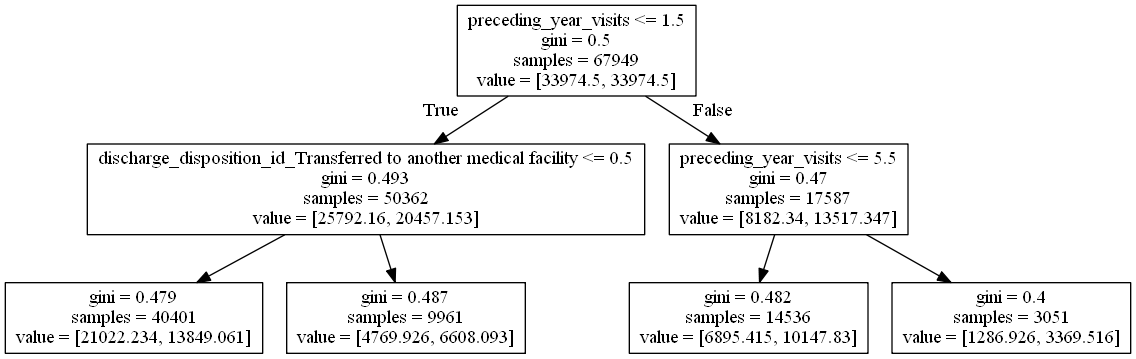

In [16]:
tree = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced',max_depth=2)
tree.fit(X_train, y_train)

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = X_train.columns
# Create DOT data
dot_data = export_graphviz(tree, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [8]:
# Forward 
DT = DecisionTreeClassifier(random_state = 0)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = DT,
          k_features=(1, 25), # Since in most of the models k was coming to be under 25 ( In Random forest 17 and 24 in lgbm)
          forward = True,       
          scoring = 'recall',
          cv = 5)               
# Train SFS with our dataset
sfs = sfs.fit(X_train, y_train)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T.sort_values(by = 'avg_score', ascending = False)
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
21,"(2, 3, 4, 5, 6, 17, 18, 25, 35, 40, 41, 44, 48...","[0.2023121387283237, 0.17148362235067438, 0.17...",0.186022,"(time_in_hospital, num_lab_procedures, num_pro..."
23,"(2, 3, 4, 5, 6, 17, 18, 25, 30, 35, 40, 41, 44...","[0.1894669235709698, 0.18497109826589594, 0.16...",0.184608,"(time_in_hospital, num_lab_procedures, num_pro..."
19,"(2, 3, 4, 5, 6, 18, 35, 40, 41, 44, 48, 59, 60...","[0.19653179190751446, 0.17212588310854207, 0.1...",0.183967,"(time_in_hospital, num_lab_procedures, num_pro..."
14,"(2, 3, 4, 5, 6, 18, 35, 41, 44, 67, 83, 89, 94...","[0.1920359666024406, 0.17726396917148363, 0.17...",0.183583,"(time_in_hospital, num_lab_procedures, num_pro..."
24,"(2, 3, 4, 5, 6, 17, 18, 25, 30, 35, 40, 41, 44...","[0.19332048811817598, 0.17790622992935132, 0.1...",0.183066,"(time_in_hospital, num_lab_procedures, num_pro..."
20,"(2, 3, 4, 5, 6, 17, 18, 35, 40, 41, 44, 48, 59...","[0.19717405266538215, 0.17533718689788053, 0.1...",0.18294,"(time_in_hospital, num_lab_procedures, num_pro..."
12,"(2, 3, 4, 5, 6, 18, 35, 41, 67, 83, 94, 96)","[0.18882466281310212, 0.17533718689788053, 0.1...",0.182684,"(time_in_hospital, num_lab_procedures, num_pro..."
17,"(2, 3, 4, 5, 6, 18, 35, 41, 44, 48, 59, 60, 67...","[0.18368657675016056, 0.16570327552986513, 0.1...",0.182299,"(time_in_hospital, num_lab_procedures, num_pro..."
11,"(2, 3, 4, 5, 6, 18, 35, 67, 83, 94, 96)","[0.1901091843288375, 0.17726396917148363, 0.17...",0.182168,"(time_in_hospital, num_lab_procedures, num_pro..."
22,"(2, 3, 4, 5, 6, 17, 18, 25, 30, 35, 40, 41, 44...","[0.18304431599229287, 0.18625561978163135, 0.1...",0.182041,"(time_in_hospital, num_lab_procedures, num_pro..."


In [9]:
sfs_results.iloc[0]

feature_idx      (2, 3, 4, 5, 6, 17, 18, 25, 35, 40, 41, 44, 48...
cv_scores        [0.2023121387283237, 0.17148362235067438, 0.17...
avg_score                                                 0.186022
feature_names    (time_in_hospital, num_lab_procedures, num_pro...
Name: 21, dtype: object

In [10]:
sfs_results.iloc[0]['feature_names']

('time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'diabetesMed',
 'preceding_year_visits',
 'discharge_disposition_id_Left AMA',
 'diag_1_Digestive',
 'diag_1_Injury and Poisoning',
 'diag_1_Mental Disorders',
 'diag_1_Nervous',
 'diag_1_Sense Organs',
 'diag_2_Mental Disorders',
 'diag_2_Musculoskeletal System and Connective Tissue',
 'diag_2_Sense Organs',
 'diag_3_Other Symptoms',
 'diag_3_Sense Organs',
 'max_glu_serum_None',
 'insulin_treatment_insulin_only',
 'insulin_treatment_other_meds')

In [7]:
# Backward
DT = DecisionTreeClassifier(random_state = 0)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = DT,
          k_features=25, 
          forward = False, 
          scoring = 'recall',
          cv = 5)               
# Train SFS with our dataset
sfs = sfs.fit(X_train, y_train)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T.sort_values(by = 'avg_score', ascending = False)
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
57,"(0, 1, 3, 4, 6, 7, 8, 12, 14, 15, 18, 19, 20, ...","[0.20745022479126526, 0.17790622992935132, 0.2...",0.196813,"(gender, age, num_lab_procedures, num_procedur..."
53,"(0, 1, 3, 4, 6, 7, 8, 14, 15, 18, 19, 21, 24, ...","[0.19460500963391136, 0.18882466281310212, 0.1...",0.195786,"(gender, age, num_lab_procedures, num_procedur..."
55,"(0, 1, 3, 4, 6, 7, 8, 14, 15, 18, 19, 21, 24, ...","[0.19396274887604367, 0.18625561978163135, 0.1...",0.195659,"(gender, age, num_lab_procedures, num_procedur..."
60,"(0, 1, 3, 4, 6, 7, 8, 12, 14, 15, 18, 19, 20, ...","[0.21258831085420682, 0.17726396917148363, 0.1...",0.195658,"(gender, age, num_lab_procedures, num_procedur..."
49,"(0, 1, 3, 4, 6, 7, 8, 15, 18, 19, 21, 24, 25, ...","[0.18625561978163135, 0.18497109826589594, 0.2...",0.1954,"(gender, age, num_lab_procedures, num_procedur..."
...,...,...,...,...
92,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16...","[0.17276814386640976, 0.16506101477199744, 0.1...",0.176001,"(gender, age, num_lab_procedures, num_procedur..."
94,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.1791907514450867, 0.15542710340398203, 0.18...",0.173818,"(gender, age, time_in_hospital, num_lab_proced..."
96,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.17597944765574824, 0.16506101477199744, 0.1...",0.171504,"(gender, age, time_in_hospital, num_lab_proced..."
95,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.17533718689788053, 0.15863840719332048, 0.1...",0.171377,"(gender, age, time_in_hospital, num_lab_proced..."


In [11]:
sfs_results.iloc[0]

feature_idx      (0, 1, 3, 4, 6, 7, 8, 12, 14, 15, 18, 19, 20, ...
cv_scores        [0.20745022479126526, 0.17790622992935132, 0.2...
avg_score                                                 0.196813
feature_names    (gender, age, num_lab_procedures, num_procedur...
Name: 57, dtype: object

In [10]:
sfs_results.iloc[0]['feature_names']

('gender',
 'age',
 'num_lab_procedures',
 'num_procedures',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'glyburide',
 'rosiglitazone',
 'insulin',
 'preceding_year_visits',
 'number_changes',
 'race_Asian',
 'race_Caucasian',
 'discharge_disposition_id_Discharged to home with home health service',
 'discharge_disposition_id_Left AMA',
 'discharge_disposition_id_Not Available',
 'discharge_disposition_id_Still patient/referred to this institution',
 'discharge_disposition_id_Transferred to another medical facility',
 'admission_source_id_Not Available',
 'admission_source_id_Referral',
 'admission_source_id_Transferred from another health care facility',
 'diag_1_Circulatory',
 'diag_1_Diabetes',
 'diag_1_Endocrine, Nutritional, Metabolic, Immunity',
 'diag_1_External causes of injury',
 'diag_1_Genitourinary',
 'diag_1_Infectious and Parasitic',
 'diag_1_Musculoskeletal System and Connective Tissue',
 'diag_1_Neoplasms',
 'diag_1_Sense Organs',
 'diag_1_Skin and Subcutaneous T

### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0, n_jobs = -1,class_weight='balanced_subsample')
RF.fit(X_train,y_train)
imp = pd.DataFrame(RF.feature_importances_,index=X_train.columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False)


,Importance
num_lab_procedures,0.092066
num_medications,0.082699
time_in_hospital,0.063871
preceding_year_visits,0.060883
age,0.049796
num_procedures,0.044180
number_diagnoses,0.042769
insulin,0.022564
gender,0.019517
discharge_disposition_id_Transferred to another medical facility,0.017339


In [ ]:
# Backward
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0, n_jobs = -1)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = RF, 
          k_features=(1,97),
          forward = False,    
          scoring = 'recall',
          cv = 3,
          n_jobs=-1)               


sfs = sfs.fit(X_dum.values, y)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T.sort_values(by = 'avg_score', ascending = False)
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
49,"(8, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30, 31...","[0.05623721881390593, 0.05834186284544524, 0.0...",0.0603698,"(8, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30, 31..."
47,"(8, 11, 13, 14, 15, 17, 23, 26, 28, 30, 31, 32...","[0.05521472392638037, 0.0593654042988741, 0.06...",0.0596877,"(8, 11, 13, 14, 15, 17, 23, 26, 28, 30, 31, 32..."
48,"(8, 11, 13, 14, 15, 17, 23, 26, 28, 30, 31, 32...","[0.05930470347648262, 0.057318321392016376, 0....",0.0596864,"(8, 11, 13, 14, 15, 17, 23, 26, 28, 30, 31, 32..."
53,"(8, 9, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30,...","[0.05725971370143149, 0.05629477993858751, 0.0...",0.0593459,"(8, 9, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30,..."
50,"(8, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30, 31...","[0.05725971370143149, 0.0593654042988741, 0.06...",0.0593459,"(8, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30, 31..."
43,"(8, 11, 13, 14, 15, 17, 23, 26, 28, 30, 31, 32...","[0.053169734151329244, 0.06038894575230297, 0....",0.0590061,"(8, 11, 13, 14, 15, 17, 23, 26, 28, 30, 31, 32..."
52,"(8, 9, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30,...","[0.05828220858895705, 0.05834186284544524, 0.0...",0.0590043,"(8, 9, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30,..."
46,"(8, 11, 13, 14, 15, 17, 23, 26, 28, 30, 31, 32...","[0.05521472392638037, 0.05834186284544524, 0.0...",0.0586642,"(8, 11, 13, 14, 15, 17, 23, 26, 28, 30, 31, 32..."
51,"(8, 9, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30,...","[0.05623721881390593, 0.05527123848515865, 0.0...",0.0586639,"(8, 9, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30,..."
55,"(8, 9, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30,...","[0.05930470347648262, 0.057318321392016376, 0....",0.0586628,"(8, 9, 11, 13, 14, 15, 17, 20, 23, 26, 28, 30,..."


In [ ]:
sfs_results.iloc[0,3]

('8',
 '11',
 '13',
 '14',
 '15',
 '17',
 '20',
 '23',
 '26',
 '28',
 '30',
 '31',
 '32',
 '33',
 '34',
 '36',
 '37',
 '41',
 '43',
 '44',
 '46',
 '47',
 '48',
 '52',
 '55',
 '56',
 '58',
 '61',
 '63',
 '65',
 '66',
 '67',
 '68',
 '70',
 '71',
 '72',
 '73',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '83',
 '85',
 '86',
 '87',
 '92',
 '94')

In [ ]:
### Forward
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0, n_jobs = -1)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = RF, 
          k_features=(1,97),
          forward = True,    
          scoring = 'recall',
          cv = 3,
          n_jobs=-1)               


sfs = sfs.fit(X_dum, y)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T.sort_values(by = 'avg_score', ascending = False)
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
17,"(0, 3, 5, 18, 20, 39, 42, 43, 46, 49, 51, 55, ...","[0.08282208588957055, 0.0767656090071648, 0.07...",0.0767374,"(gender, num_lab_procedures, num_medications, ..."
13,"(0, 3, 5, 18, 42, 43, 46, 49, 51, 55, 63, 82, 93)","[0.08486707566462168, 0.07881269191402251, 0.0...",0.0767367,"(gender, num_lab_procedures, num_medications, ..."
15,"(0, 3, 5, 18, 39, 42, 43, 46, 49, 51, 55, 63, ...","[0.081799591002045, 0.07471852610030706, 0.070...",0.0757142,"(gender, num_lab_procedures, num_medications, ..."
8,"(0, 3, 5, 18, 43, 49, 82, 93)","[0.07770961145194274, 0.07574206755373593, 0.0...",0.0753744,"(gender, num_lab_procedures, num_medications, ..."
20,"(0, 3, 5, 9, 18, 20, 23, 39, 42, 43, 46, 48, 4...","[0.07975460122699386, 0.07471852610030706, 0.0...",0.0753737,"(gender, num_lab_procedures, num_medications, ..."
11,"(0, 3, 5, 18, 42, 43, 46, 49, 51, 82, 93)","[0.08077709611451943, 0.07471852610030706, 0.0...",0.0753733,"(gender, num_lab_procedures, num_medications, ..."
14,"(0, 3, 5, 18, 42, 43, 46, 49, 51, 55, 63, 67, ...","[0.081799591002045, 0.07574206755373593, 0.068...",0.075373,"(gender, num_lab_procedures, num_medications, ..."
16,"(0, 3, 5, 18, 39, 42, 43, 46, 49, 51, 55, 63, ...","[0.07975460122699386, 0.07778915046059365, 0.0...",0.0750325,"(gender, num_lab_procedures, num_medications, ..."
21,"(0, 3, 5, 9, 18, 20, 23, 39, 42, 43, 46, 48, 4...","[0.07668711656441718, 0.07471852610030706, 0.0...",0.0746924,"(gender, num_lab_procedures, num_medications, ..."
18,"(0, 3, 5, 9, 18, 20, 39, 42, 43, 46, 49, 51, 5...","[0.08077709611451943, 0.07778915046059365, 0.0...",0.074691,"(gender, num_lab_procedures, num_medications, ..."


In [ ]:
sfs_results.iloc[0,3]

('gender',
 'num_lab_procedures',
 'num_medications',
 'preceding_year_visits',
 'race_Asian',
 'diag_1_Infectious and Parasitic',
 'diag_1_Musculoskeletal System and Connective Tissue',
 'diag_1_Neoplasms',
 'diag_1_Pregnancy, Childbirth',
 'diag_1_Skin and Subcutaneous Tissue',
 'diag_2_Congenital Anomalies',
 'diag_2_External causes of injury',
 'diag_2_Not Required',
 'diag_2_Sense Organs',
 'diag_3_Not Required',
 'diag_3_Pregnancy, Childbirth',
 'A1Cresult_Norm')

### Gradient Boosting

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state = 0)

GB.fit(X_train,y_train)
imp = pd.DataFrame(GB.feature_importances_,index=X_train.columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False)

,Importance
num_lab_procedures,0.119751
num_medications,0.100188
time_in_hospital,0.068011
age,0.050790
num_procedures,0.040278
...,...
diag_2_Not Required,0.000518
"diag_2_Pregnancy, Childbirth",0.000402
diag_2_Sense Organs,0.000386
diag_1_Sense Organs,0.000259


In [8]:
GB = GradientBoostingClassifier(random_state = 0)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = GB,
          k_features=(1, 25),
          forward = True,      
          scoring = 'recall',
          cv = 3)               
# Train SFS with our dataset
sfs = sfs.fit(X_train, y_train)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T.sort_values(by = 'avg_score', ascending = False)
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
21,"(2, 3, 4, 5, 6, 17, 18, 25, 35, 40, 41, 44, 48...","[0.2023121387283237, 0.17148362235067438, 0.17...",0.186022,"(time_in_hospital, num_lab_procedures, num_pro..."
23,"(2, 3, 4, 5, 6, 17, 18, 25, 30, 35, 40, 41, 44...","[0.1894669235709698, 0.18497109826589594, 0.16...",0.184608,"(time_in_hospital, num_lab_procedures, num_pro..."
19,"(2, 3, 4, 5, 6, 18, 35, 40, 41, 44, 48, 59, 60...","[0.19653179190751446, 0.17212588310854207, 0.1...",0.183967,"(time_in_hospital, num_lab_procedures, num_pro..."
14,"(2, 3, 4, 5, 6, 18, 35, 41, 44, 67, 83, 89, 94...","[0.1920359666024406, 0.17726396917148363, 0.17...",0.183583,"(time_in_hospital, num_lab_procedures, num_pro..."
24,"(2, 3, 4, 5, 6, 17, 18, 25, 30, 35, 40, 41, 44...","[0.19332048811817598, 0.17790622992935132, 0.1...",0.183066,"(time_in_hospital, num_lab_procedures, num_pro..."
20,"(2, 3, 4, 5, 6, 17, 18, 35, 40, 41, 44, 48, 59...","[0.19717405266538215, 0.17533718689788053, 0.1...",0.18294,"(time_in_hospital, num_lab_procedures, num_pro..."
12,"(2, 3, 4, 5, 6, 18, 35, 41, 67, 83, 94, 96)","[0.18882466281310212, 0.17533718689788053, 0.1...",0.182684,"(time_in_hospital, num_lab_procedures, num_pro..."
17,"(2, 3, 4, 5, 6, 18, 35, 41, 44, 48, 59, 60, 67...","[0.18368657675016056, 0.16570327552986513, 0.1...",0.182299,"(time_in_hospital, num_lab_procedures, num_pro..."
11,"(2, 3, 4, 5, 6, 18, 35, 67, 83, 94, 96)","[0.1901091843288375, 0.17726396917148363, 0.17...",0.182168,"(time_in_hospital, num_lab_procedures, num_pro..."
22,"(2, 3, 4, 5, 6, 17, 18, 25, 30, 35, 40, 41, 44...","[0.18304431599229287, 0.18625561978163135, 0.1...",0.182041,"(time_in_hospital, num_lab_procedures, num_pro..."


In [10]:
sfs_results.iloc[0]['feature_names']

('time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'diabetesMed',
 'preceding_year_visits',
 'discharge_disposition_id_Left AMA',
 'diag_1_Digestive',
 'diag_1_Injury and Poisoning',
 'diag_1_Mental Disorders',
 'diag_1_Nervous',
 'diag_1_Sense Organs',
 'diag_2_Mental Disorders',
 'diag_2_Musculoskeletal System and Connective Tissue',
 'diag_2_Sense Organs',
 'diag_3_Other Symptoms',
 'diag_3_Sense Organs',
 'max_glu_serum_None',
 'insulin_treatment_insulin_only',
 'insulin_treatment_other_meds')

### LGBM

In [ ]:
# LGBM Forward
model1 = LGBMClassifier(random_state = 0, n_jobs = -1, class_weight = 'balanced')

# Create an SFS object
sfs1 = SFS(estimator = model1,
          k_features = (1, 97),
          forward = True,       # Set forward to True when we want to perform SFS
          scoring = 'f1',
          cv = 3)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs1 = sfs1.fit(X_dum, y)

In [ ]:
# Show the performance of each subset of features considered by SFS
sfs1_results = pd.DataFrame.from_dict(sfs1.subsets_).T.sort_values(by = 'avg_score', ascending = False) 
sfs1_results

,feature_idx,cv_scores,avg_score,feature_names
24,"(16, 18, 22, 23, 25, 27, 28, 41, 43, 46, 47, 4...","[0.2824644549763033, 0.2667087011349306, 0.267...",0.2721,"(glyburide-metformin, preceding_year_visits, r..."
26,"(16, 18, 22, 23, 25, 27, 28, 41, 43, 46, 47, 4...","[0.2824117463292721, 0.2698059179128221, 0.263...",0.271929,"(glyburide-metformin, preceding_year_visits, r..."
22,"(16, 18, 22, 23, 25, 27, 28, 43, 46, 47, 49, 5...","[0.2807680201447907, 0.26803482587064675, 0.26...",0.271837,"(glyburide-metformin, preceding_year_visits, r..."
21,"(16, 18, 22, 23, 25, 27, 28, 43, 46, 47, 49, 5...","[0.2813089993706734, 0.26762320648783533, 0.26...",0.271685,"(glyburide-metformin, preceding_year_visits, r..."
23,"(16, 18, 22, 23, 25, 27, 28, 43, 46, 47, 48, 4...","[0.2802627463246794, 0.26824703680598877, 0.26...",0.271614,"(glyburide-metformin, preceding_year_visits, r..."
19,"(16, 18, 22, 25, 27, 28, 43, 46, 47, 49, 51, 5...","[0.2807017543859649, 0.2663769015833592, 0.267...",0.271597,"(glyburide-metformin, preceding_year_visits, r..."
25,"(16, 18, 22, 23, 25, 27, 28, 41, 43, 46, 47, 4...","[0.2810071495181847, 0.26756066411238827, 0.26...",0.27159,"(glyburide-metformin, preceding_year_visits, r..."
20,"(16, 18, 22, 25, 27, 28, 43, 46, 47, 49, 51, 5...","[0.27972465581977474, 0.26712328767123283, 0.2...",0.271282,"(glyburide-metformin, preceding_year_visits, r..."
18,"(16, 18, 22, 25, 27, 28, 43, 46, 47, 49, 56, 5...","[0.2802507836990596, 0.26645962732919254, 0.26...",0.271278,"(glyburide-metformin, preceding_year_visits, r..."
16,"(16, 18, 22, 25, 27, 28, 43, 46, 47, 49, 59, 6...","[0.28201970443349755, 0.26634086744043983, 0.2...",0.271079,"(glyburide-metformin, preceding_year_visits, r..."


In [ ]:
sfs1_results.iloc[0, 3]

('glyburide-metformin',
 'preceding_year_visits',
 'race_Hispanic',
 'race_Other',
 'discharge_disposition_id_Left AMA',
 'discharge_disposition_id_Still patient/referred to this institution',
 'discharge_disposition_id_Transferred to another medical facility',
 'diag_1_Mental Disorders',
 'diag_1_Neoplasms',
 'diag_1_Pregnancy, Childbirth',
 'diag_1_Respiratory',
 'diag_1_Sense Organs',
 'diag_1_Skin and Subcutaneous Tissue',
 'diag_2_Congenital Anomalies',
 'diag_2_Genitourinary',
 'diag_2_Mental Disorders',
 'diag_2_Musculoskeletal System and Connective Tissue',
 'diag_2_Nervous',
 'diag_2_Not Required',
 'diag_2_Other Symptoms',
 'diag_2_Pregnancy, Childbirth',
 'diag_2_Sense Organs',
 'diag_3_Pregnancy, Childbirth',
 'diag_3_Sense Organs')